In [2]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diusion algorithm found in 11.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [16]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    
    #U is the image matrix, l is the columns, m is the rows, have it U[m][l]
    
    #pad U first bc told want to use padded array technique:
    U = np.pad(U, 1, mode='edge')
    
    #now do everything for equation 11.1:
    for n in range(N):  #have to go through and do it N times (bc of U^n+1 and U^n indices have
        U[1:-1, 1:-1] = U[1:-1, 1:-1] + lambda_*(g(np.abs(U[1:-1,:-2]) - U[1:-1,1:-1])*(U[1:-1,:-2] - U[1:-1,1:-1])
                                        +g(np.abs(U[1:-1, 2:] - U[1:-1, 1:-1]))*(U[1:-1, 2:] - U[1:-1, 1:-1])
                                        +g(np.abs(U[:-2, 1:-1] - U[1:-1, 1:-1]))*(U[:-2, 1:-1] - U[1:-1, 1:-1])
                                        +g(np.abs(U[2:, 1:-1] - U[1:-1, 1:-1]))*(U[2:, 1:-1] - U[1:-1, 1:-1]))
        
    return U

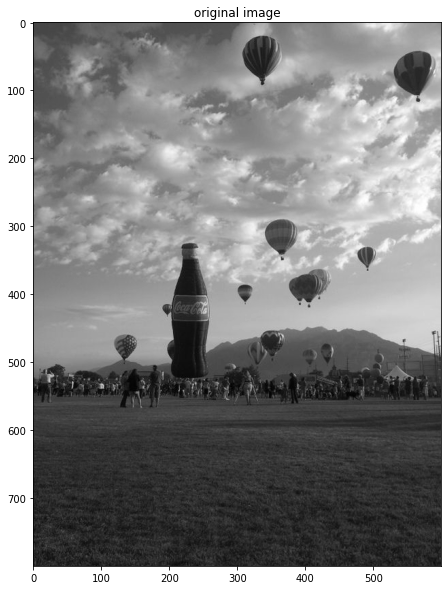

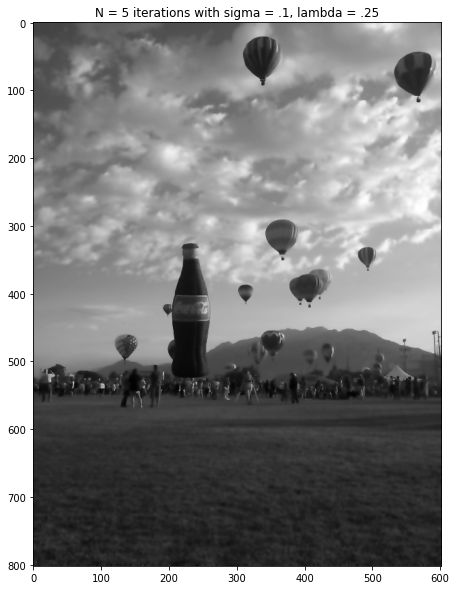

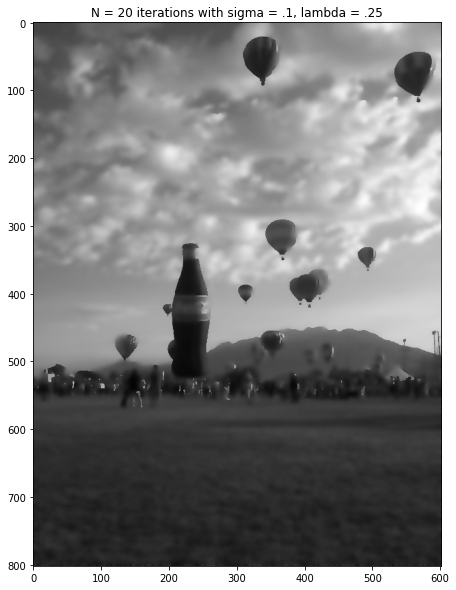

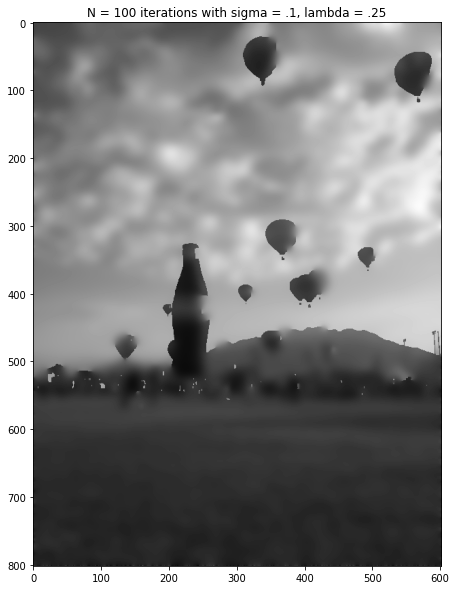

In [34]:
#test prob 1:

#read in the picture:
picture = imread("balloon.jpg", as_gray = True) * 1./255

#display the original image:
plt.imshow(picture, cmap=cm.gray)
plt.title("original image")
plt.show()

sigma = .1
lambda_ = .25

g = lambda x: np.exp(-((x/sigma)**2))

#call our function for each number of iteration N that want to have
#get diffused image like problem asks us to:
for N in [5, 20, 100]:
    pic = anisdiff_bw(picture, N, lambda_, g)
    
    #display the picture as grayscale:
    plt.imshow(pic, cmap=cm.gray)
    plt.title("N = " + str(N) + " iterations with sigma = .1, lambda = .25")
    plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [35]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    
    #pad U matrix:
    U = np.pad(U, 1, mode='edge')
    
    #do everything for the now modified version of equation 11.1 that have here for colored image
    #compute the calcuations for each time step N
    for n in range(N):
        #compute each row/column like did in last problem but use norms now because its in R3 now instead
        #of the abs values
        
        #so get the norm for each difference in the equation have:
        norm1 = np.sqrt(np.sum((U[1:-1, :-2] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        norm2 = np.sqrt(np.sum((U[1:-1, 2:] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        norm3 = np.sqrt(np.sum((U[:-2,1:-1] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        norm4 = np.sqrt(np.sum((U[2:,1:-1] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        
        #now get the actual U equation thingy:
        U[1:-1,1:-1] = U[1:-1,1:-1] + lambda_*(g(norm1)*(U[1:-1,:-2] - U[1:-1,1:-1])
                                        +g(norm2)*(U[1:-1,2:] - U[1:-1,1:-1])
                                        +g(norm3)*(U[:-2,1:-1] - U[1:-1,1:-1])
                                        +g(norm4)*(U[2:,1:-1] - U[1:-1,1:-1]))
        
    return U[1:-1,1:-1,1:-1]  #need to account for how it's R3 now

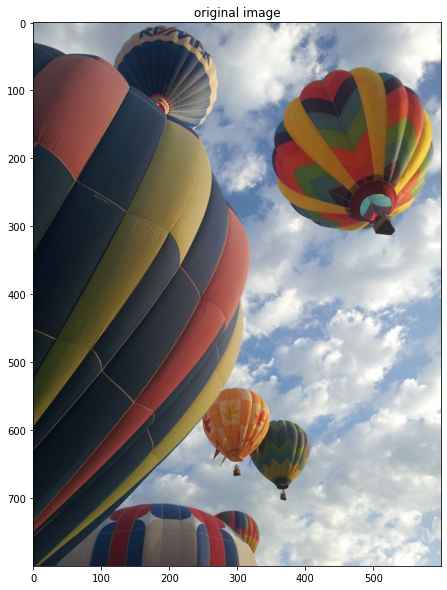

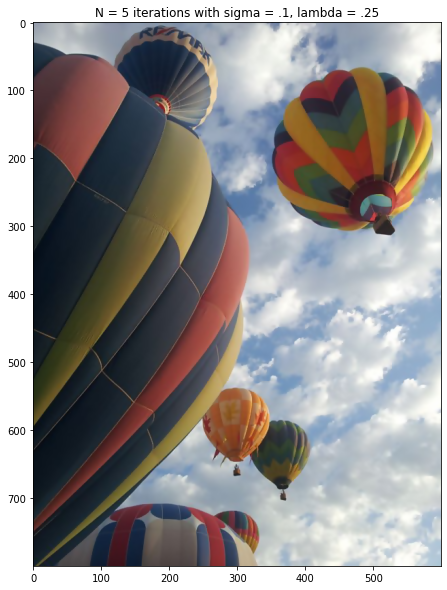

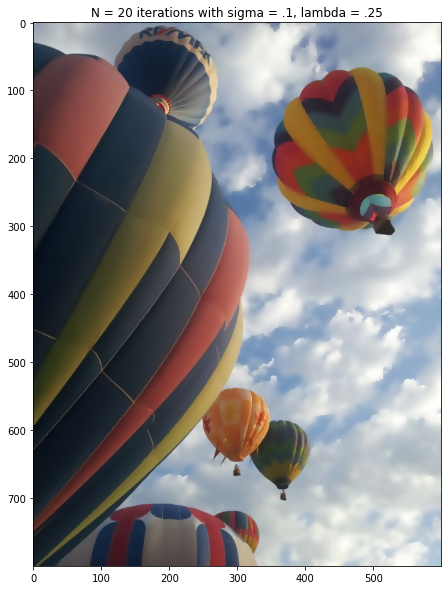

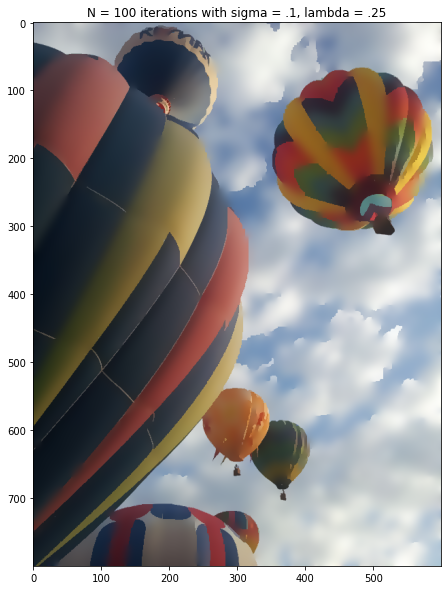

In [39]:
#test prob 2:

#read in the picture:
picture = imread("balloons_color.jpg") * 1./255

#display the original image:
plt.imshow(picture)
plt.title("original image")
plt.show()

sigma = .1
lambda_ = .25

g = lambda x: np.exp(-((x/sigma)**2))

#call our function for each number of iteration N that want to have
#get diffused image like problem asks us to:
for N in [5, 20, 100]:
    pic = anisdiff_color(picture, N, lambda_, g)
    
    #display the picture as grayscale:
    plt.imshow(pic)
    plt.title("N = " + str(N) + " iterations with sigma = .1, lambda = .25")
    plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

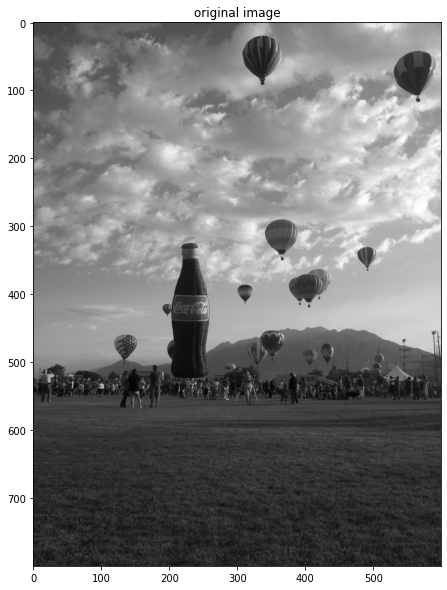

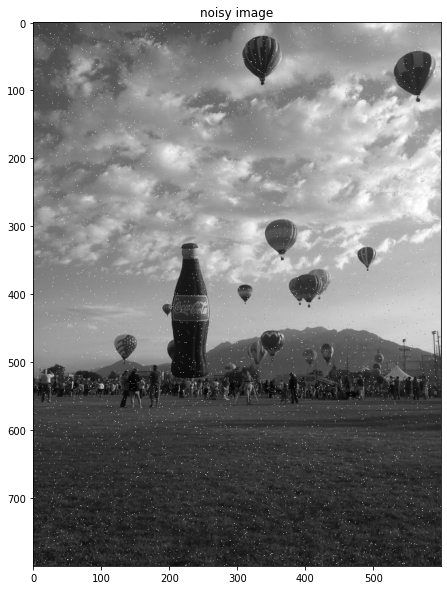

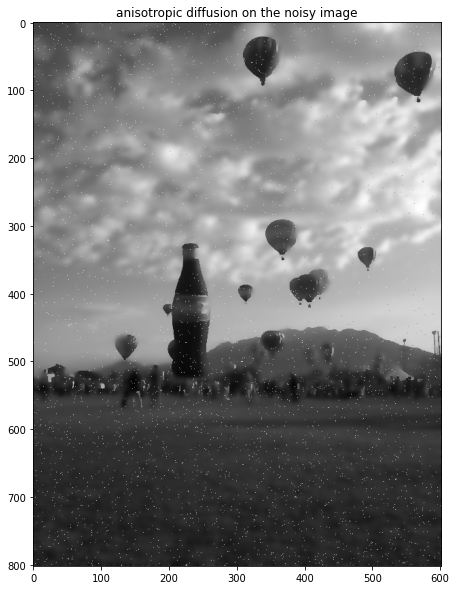

In [49]:
#display OG image:
image = imread('balloon.jpg', as_gray=True)
plt.imshow(image, cmap = cm.gray)
plt.title("original image")
plt.show()

#code to add noise to your grayscale image:
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

#display noisy image:
image /= 255  #need to scale the image
plt.imshow(image, cmap = cm.gray)
plt.title("noisy image")
plt.show()

#run anisdiff_bw() on the noisy image with parameters given:
sigma = .1
lambda_ = .25
N = 20
g = lambda x: np.exp(-((x/sigma)**2))

pic = anisdiff_bw(image, N, lambda_, g)
    
#display the picture as grayscale:
plt.imshow(pic, cmap=cm.gray)
plt.title("anisotropic diffusion on the noisy image")
plt.show()

## Anisotropic diffusion does not smooth out the noise because anisotropic diffusion is designed to stop at the boundaries, but the noise has a clear boundary so it will not blur across the boundary. There are sharp boundaries on the snow (the white spot on the image) so it will not smooth past those boundaries
